In [47]:
import readfa as rf
import sys
from pathlib import Path
import matplotlib.pyplot as plt 

In [ ]:
# TODO:

# Read file1.fa, implement function for obtaining canonical k-mers (set),
# calculate factor complexity for several selected k-mers: 2,3,4,10,14,18,22 – what behaviour do you observe?
# Canonical k-mers - k-mers in which both the forward and reverse complement of a sequence are treated as identical

## 1. Factor complexity of first dataset for different k ##

In [25]:
# auxiliary functions
pairs = {
  'A': 'T',
  'C': 'G',
  'G': 'C',
  'T': 'A',
}

def are_palindromes(kmer1, kmer2, pairs):
    if len(kmer1) != len(kmer2):
        return False
    for index, char in enumerate(kmer1):
        if kmer2[len(kmer2)-1-index] != pairs[char]:
            return False
    return True

def make_palindrome(kmer_input, pairs):
    kmer = list(kmer_input)
    for index, char in enumerate(kmer):
        if char in pairs:
            kmer[index] = pairs[char]
    return str(kmer)

In [50]:
# main function
def obtain_canon_kmers(k, seq):
    canon_kmers = set() # set to store k-mers
    start = 0
    while start + k < len(seq): # iterating through the sequence
        if make_palindrome(seq[start:start + k], pairs) not in canon_kmers: # check for palindrome occurrence
            canon_kmers.add(seq[start:start+k]) # method set.add() adds only if it's not present
        start += 1
    return canon_kmers

fac_complexity = {}
with open('file1.fa') as f:
    for name, seq, _ in rf.readfq(f):
        for k in range(1,32):
            fac_complexity[k] = len(obtain_canon_kmers(k, seq))
print(fac_complexity)

{1: 4, 2: 16, 3: 64, 4: 256, 5: 1024, 6: 4096, 7: 16384, 8: 65145, 9: 243337, 10: 704926, 11: 1347362, 12: 1816718, 13: 2029974, 14: 2105980, 15: 2131391, 16: 2140506, 17: 2144644, 18: 2147227, 19: 2149264, 20: 2151078, 21: 2152776, 22: 2154369, 23: 2155885, 24: 2157344, 25: 2158707, 26: 2160033, 27: 2161311, 28: 2162518, 29: 2163679, 30: 2164802, 31: 2165829}


{1: 4, 2: 16, 3: 64, 4: 256, 5: 1024, 6: 4096, 7: 16384, 8: 65145, 9: 243337, 10: 704926, 11: 1347362, 12: 1816718, 13: 2029974, 14: 2105980, 15: 2131391, 16: 2140506, 17: 2144644, 18: 2147227, 19: 2149264, 20: 2151078, 21: 2152776, 22: 2154369, 23: 2155885, 24: 2157344, 25: 2158707, 26: 2160033, 27: 2161311, 28: 2162518, 29: 2163679, 30: 2164802, 31: 2165829}


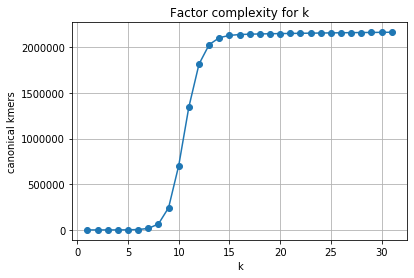

In [55]:
# visualize data
fac_complexity = {1: 4, 2: 16, 3: 64, 4: 256, 5: 1024, 6: 4096, 7: 16384, 8: 65145, 9: 243337, 10: 704926, 11: 1347362, 12: 1816718, 13: 2029974, 14: 2105980, 15: 2131391, 16: 2140506, 17: 2144644, 18: 2147227, 19: 2149264, 20: 2151078, 21: 2152776, 22: 2154369, 23: 2155885, 24: 2157344, 25: 2158707, 26: 2160033, 27: 2161311, 28: 2162518, 29: 2163679, 30: 2164802, 31: 2165829}
print(fac_complexity)
x_values = list(fac_complexity.keys())
y_values = list(fac_complexity.values())
plt.plot(x_values, y_values, marker='o', linestyle='-')  # 'o' for markers, '-' for line
plt.title("Factor complexity for k")
plt.xlabel("k")
plt.ylabel("canonical kmers")

# Display the plot
plt.grid(True)  # Optional: Add grid lines
plt.show()